In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data, walk_through_dir

In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,
                                                                            label_mode="categorical",batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,
                                                                            label_mode="categorical",batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images,labels in train_data_10_percent.take(1):
    print(images,labels)

tf.Tensor(
[[[[3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.65714264e+01 0.00000000e+00 0.00000000e+00]
   ...
   [1.20734795e+02 1.04576653e+02 9.42960358e+01]
   [1.24954109e+02 1.11311256e+02 1.02311256e+02]
   [1.31801147e+02 1.17515434e+02 1.10158287e+02]]

  [[3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.65714264e+01 0.00000000e+00 0.00000000e+00]
   ...
   [8.01837616e+01 6.02704926e+01 5.28266602e+01]
   [7.92193832e+01 5.94336700e+01 5.23622398e+01]
   [8.59746552e+01 6.52603683e+01 6.01175156e+01]]

  [[3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.80000000e+01 0.00000000e+00 0.00000000e+00]
   [3.65714264e+01 0.00000000e+00 0.00000000e+00]
   ...
   [5.09030342e+01 2.24744606e+01 1.89030342e+01]
   [4.70714264e+01 1.86428566e+01 1.58571415e+01]
   [5.17654152e+01 2.31225567e+01 2.03368416e+01]]

  ...

  [[3.44387589e+01 1.28061998e+00 0.00000000e+00]
   [3

In [10]:
#    base_model = tf.keras.applications.EfficientNetB0(include_top=False)
##     base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

In [11]:
#MODEL 0000000000000000000000000000
## USING TF.KERAS.APPLICATIONS
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#freeze the base model
base_model.trainable = False

#create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# pass the inputs to the base model
x=base_model(inputs)
print(f"Shape after inputs through base model : {x.shape}")

# Average pool the outputs of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GobalAveragePooling2D: {x.shape}")

#create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

#compile the model
model_0.compile(loss="categorical_crossentropy",
               optimizer =tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#FIT the model
history_10_percent = model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,validation_steps=(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback("transfer_learning","10_percent_feature_extraction")])

Shape after inputs through base model : (None, 7, 7, 1280)
Shape after GobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230913-123317
Epoch 1/5
24/24 [==============================] - 65s 2s/step - loss: 1.8368 - accuracy: 0.4187 - val_loss: 1.2818 - val_accuracy: 0.7359
Epoch 2/5
24/24 [==============================] - 57s 2s/step - loss: 1.0833 - accuracy: 0.7693 - val_loss: 0.8663 - val_accuracy: 0.8016
Epoch 3/5
24/24 [==============================] - 54s 2s/step - loss: 0.7749 - accuracy: 0.8173 - val_loss: 0.7076 - val_accuracy: 0.8297
Epoch 4/5
24/24 [==============================] - 58s 2s/step - loss: 0.6377 - accuracy: 0.8560 - val_loss: 0.6181 - val_accuracy: 0.8469
Epoch 5/5
24/24 [==============================] - 80s 3s/step - loss: 0.5345 - accuracy: 0.8867 - val_loss: 0.5645 - val_accuracy: 0.8562


In [12]:
model_0.evaluate(test_data)

79/79 [==============================] - 101s 1s/step - loss: 0.5528 - accuracy: 0.8640


[0.5527974963188171, 0.8640000224113464]

In [13]:
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [14]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [15]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

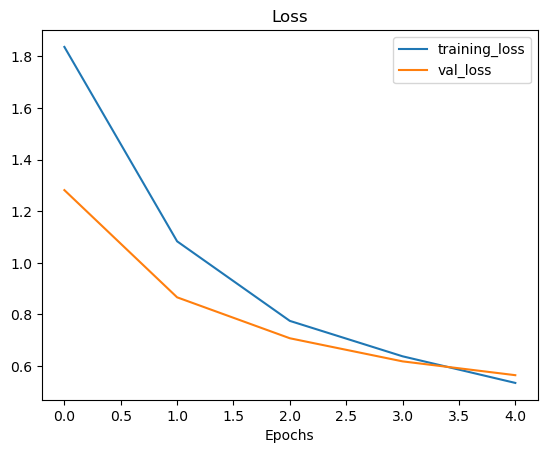

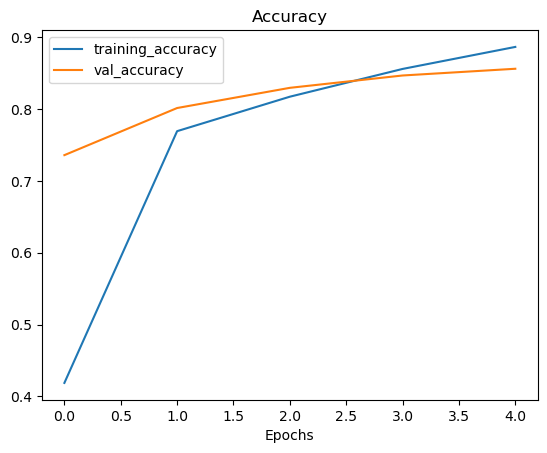

In [16]:
plot_loss_curves(history_10_percent)

In [17]:
#getting a feature vector from a trained model
input_shape = (1,4,4,3)

#create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random input tensor:\n{input_tensor}\n")

#pass the random tensor thrpugh a global average pooling 2D layer
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor: \n {global_average_pooled_tensor}")

print(f"shpae of input tensor :\n {input_tensor.shape}")
print(f"shape og=f global average pooled 2D tensor : {global_average_pooled_tensor.shape}")

random input tensor:
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor: 
 [[-0.09368646 -0.45840445 -0.28855976]]
shpae of input tensor :
 (1, 4, 4, 3)
shape og=f global average pooled 2D tensor : (1, 3)


In [18]:
#replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [19]:
## MODEL 2
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [20]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [21]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [51]:
# Create model 2 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # if you're using a model such as ResNet50V2, you'll need to rescale your data, efficientnet has rescaling built-in
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and outputs (including the layers in between)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # augment our training images (augmentation doesn't occur on test data)
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, this also insures batchnorm layers don't get updated - https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [23]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [24]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="10_percent_data_aug"),
                                                     checkpoint_callback])
     


Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230913-124020
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9828 - accuracy: 0.3587
Epoch 1: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 106s 4s/step - loss: 1.9828 - accuracy: 0.3587 - val_loss: 1.4639 - val_accuracy: 0.6628
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3185 - accuracy: 0.6960
Epoch 2: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 94s 4s/step - loss: 1.3185 - accuracy: 0.6960 - val_loss: 0.9890 - val_accuracy: 0.7895
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9884 - accuracy: 0.7747
Epoch 3: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 63s 3s/step - loss: 0.9884 - accuracy: 0.7747 - val_loss: 0.7774 - val_accuracy: 0.8092
Epoch 4/5

In [25]:
model_0.evaluate(test_data)

79/79 [==============================] - 98s 1s/step - loss: 0.5528 - accuracy: 0.8640


[0.5527974367141724, 0.8640000224113464]

In [26]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 96s 1s/step - loss: 0.6271 - accuracy: 0.8432


[0.6271334290504456, 0.8432000279426575]

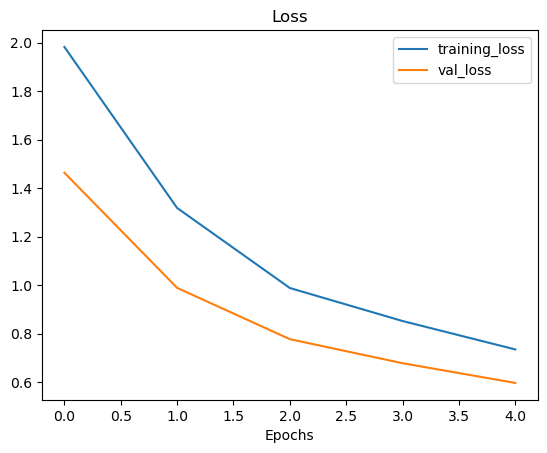

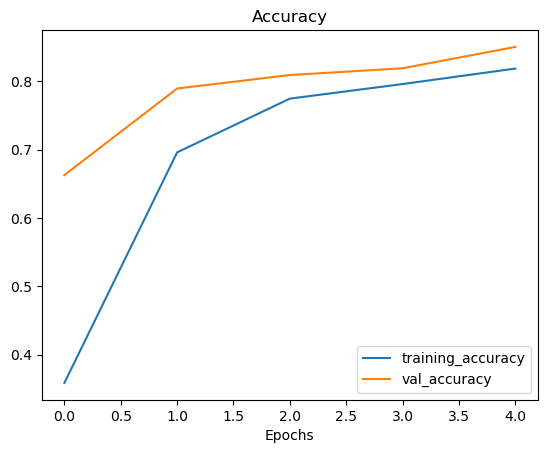

In [27]:
plot_loss_curves(history_10_percent_data_aug)

In [28]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [29]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 96s 1s/step - loss: 0.6271 - accuracy: 0.8432


In [30]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [31]:
results_10_percent_data_aug

[0.6271334290504456, 0.8432000279426575]

In [32]:
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [33]:
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[5.96046448e-08 0.00000000e+00]


In [34]:
#model 3
model_2.layers

In [35]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x0000010B825CA7D0> True
<keras.src.engine.sequential.Sequential object at 0x0000010BE5E6C410> True
<keras.src.engine.functional.Functional object at 0x0000010B826A9B10> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x0000010B82663A50> True
<keras.src.layers.core.dense.Dense object at 0x0000010B82AB8510> True


In [36]:
for i,layer in enumerate(model_2.layers[2].layers):
    print(i,layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [37]:
print(len(model_2.layers[2].trainable_variables))

0


In [52]:
#last 10 variables of the base model to trainable
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False
    
model_2.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
               metrics = ["accuracy"])

In [39]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [40]:
print(len(model_2.trainable_variables))

12


In [41]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs +5

history_3 = model_2.fit(train_data_10_percent, epochs = fine_tune_epochs,
                       validation_data=test_data, validation_steps = int(0.2*len(test_data)),
                       initial_epoch = history_10_percent_data_aug.epoch[-1],
                       callbacks = [create_tensorboard_callback("transfer_learning","10_percent_finetuning")])

Saving TensorBoard log files to: transfer_learning/10_percent_finetuning/20230913-125141
Epoch 5/10
24/24 [==============================] - 63s 2s/step - loss: 0.7336 - accuracy: 0.7653 - val_loss: 0.4659 - val_accuracy: 0.8396
Epoch 6/10
24/24 [==============================] - 56s 2s/step - loss: 0.3576 - accuracy: 0.8920 - val_loss: 0.4140 - val_accuracy: 0.8729
Epoch 7/10
24/24 [==============================] - 58s 2s/step - loss: 0.2193 - accuracy: 0.9307 - val_loss: 0.5524 - val_accuracy: 0.8354
Epoch 8/10
24/24 [==============================] - 57s 2s/step - loss: 0.1712 - accuracy: 0.9453 - val_loss: 0.4802 - val_accuracy: 0.8583
Epoch 9/10
24/24 [==============================] - 60s 3s/step - loss: 0.1131 - accuracy: 0.9627 - val_loss: 0.4612 - val_accuracy: 0.8687
Epoch 10/10
24/24 [==============================] - 54s 2s/step - loss: 0.1205 - accuracy: 0.9587 - val_loss: 0.4422 - val_accuracy: 0.8604


In [42]:
result_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 95s 1s/step - loss: 0.5108 - accuracy: 0.8492


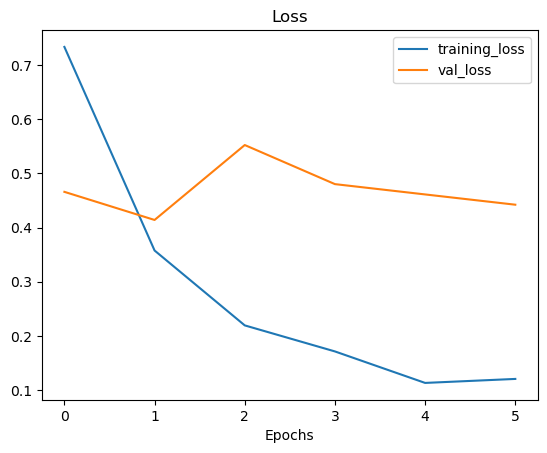

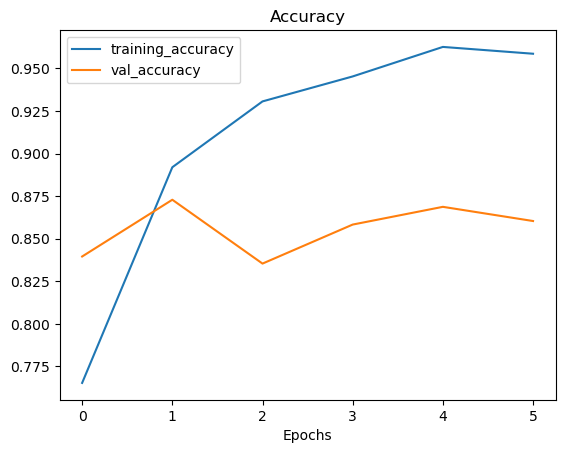

In [43]:
plot_loss_curves(history_3)

In [44]:
import matplotlib.pyplot as plt
def compare_history(OG, NEW, initial_epochs=5):
    acc = OG.history["accuracy"]
    loss = OG.history["loss"]
    
    val_acc = OG.history["val_accuracy"]
    val_loss = OG.history["val_loss"]
    
    
    total_acc = acc + NEW.history["accuracy"]
    total_loss = loss + NEW.history["loss"]
    
    total_val_acc = val_acc + NEW.history["val_accuracy"]
    total_val_loss = val_loss + NEW.history["val_loss"]
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc,label = "Training accuracy")
    plt.plot(total_val_acc, label="Val Accuracy")
    plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(),label = "Start Fine Tuning")
    plt.legend(loc = "lower right")
    plt.title("Training and Validation Accuracy")
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,2)
    plt.plot(total_loss,label = "Training Loss")
    plt.plot(total_val_loss, label="Val Loss")
    plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(),label = "Start Fine Tuning")
    plt.legend(loc = "lower right")
    plt.title("Training and Validation Accuracy")

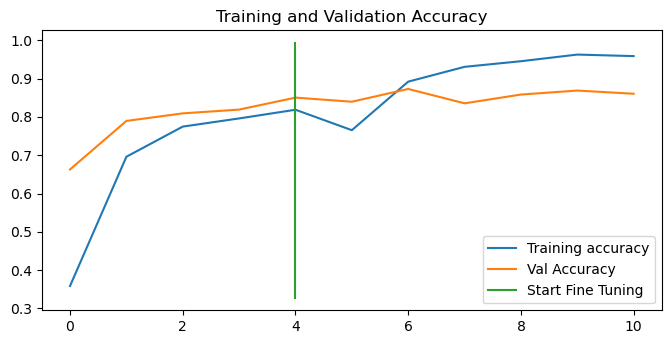

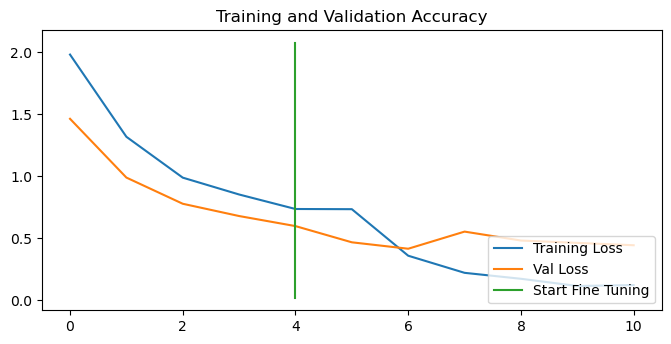

In [45]:
compare_history(history_10_percent_data_aug,history_3)

In [46]:
#model 4
unzip_data("10_food_classes_all_data.zip")

In [47]:
#setting up training and test
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [48]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode = "categorical" , image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode = "categorical" , image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [49]:
model_2.evaluate(test_data)

79/79 [==============================] - 100s 1s/step - loss: 0.5108 - accuracy: 0.8492


[0.510809600353241, 0.8492000102996826]

In [53]:
#load weights from checkpoints
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
model_2.load_weights(checkpoint_path)

In [54]:
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.13.0


In [55]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [56]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [57]:
model_2.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(lr=0.0001),
               metrics=["accuracy"])

In [59]:
FTE = initial_epochs+5

history_4 = model_2.fit(train_data,epochs = FTE,
                       validation_data=test_data,validation_steps = int(0.1*len(test_data)),
                        initial_epoch= history_10_percent_data_aug.epoch[-1],
                        callbacks=[create_tensorboard_callback("transfer_learning","full_class_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/full_class_fine_tuning/20230913-143512
Epoch 5/10
235/235 [==============================] - 349s 1s/step - loss: 0.2761 - accuracy: 0.9069 - val_loss: 0.3951 - val_accuracy: 0.8616
Epoch 6/10
235/235 [==============================] - 330s 1s/step - loss: 0.2270 - accuracy: 0.9253 - val_loss: 0.4708 - val_accuracy: 0.8571
Epoch 7/10
235/235 [==============================] - 342s 1s/step - loss: 0.1971 - accuracy: 0.9353 - val_loss: 0.4153 - val_accuracy: 0.8616
Epoch 8/10
235/235 [==============================] - 331s 1s/step - loss: 0.1808 - accuracy: 0.9395 - val_loss: 0.4480 - val_accuracy: 0.8571
Epoch 9/10
235/235 [==============================] - 331s 1s/step - loss: 0.1559 - accuracy: 0.9468 - val_loss: 0.3913 - val_accuracy: 0.8661
Epoch 10/10
235/235 [==============================] - 332s 1s/step - loss: 0.1388 - accuracy: 0.9521 - val_loss: 0.3858 - val_accuracy: 0.8929


In [60]:
model_2.evaluate(test_data)

79/79 [==============================] - 96s 1s/step - loss: 0.2775 - accuracy: 0.9168


[0.277524471282959, 0.9168000221252441]